In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sinchan69","key":"a8b30f93b9bb2700aff3c245a3d799e8"}'}

In [3]:
import os
import zipfile

# Create the Kaggle folder and move the file
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d kyanyoga/sample-sales-data
!unzip sample-sales-data.zip


Dataset URL: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data
License(s): CC0-1.0
  0% 0.00/77.5k [00:00<?, ?B/s]
100% 77.5k/77.5k [00:00<00:00, 236MB/s]
Archive:  sample-sales-data.zip
  inflating: sales_data_sample.csv   


explore the dataset

In [6]:

!kaggle datasets download -d kyanyoga/sample-sales-data


!unzip sample-sales-data.zip


Dataset URL: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data
License(s): CC0-1.0
sample-sales-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sample-sales-data.zip
replace sales_data_sample.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
!ls


drive  sales_data_sample.csv  sample_data  sample-sales-data.zip


In [8]:
import pandas as pd

df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [9]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


preparing monthly sales

In [12]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

/tmp/ipython-input-13-4282080234.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['SALES'].resample('M').sum()


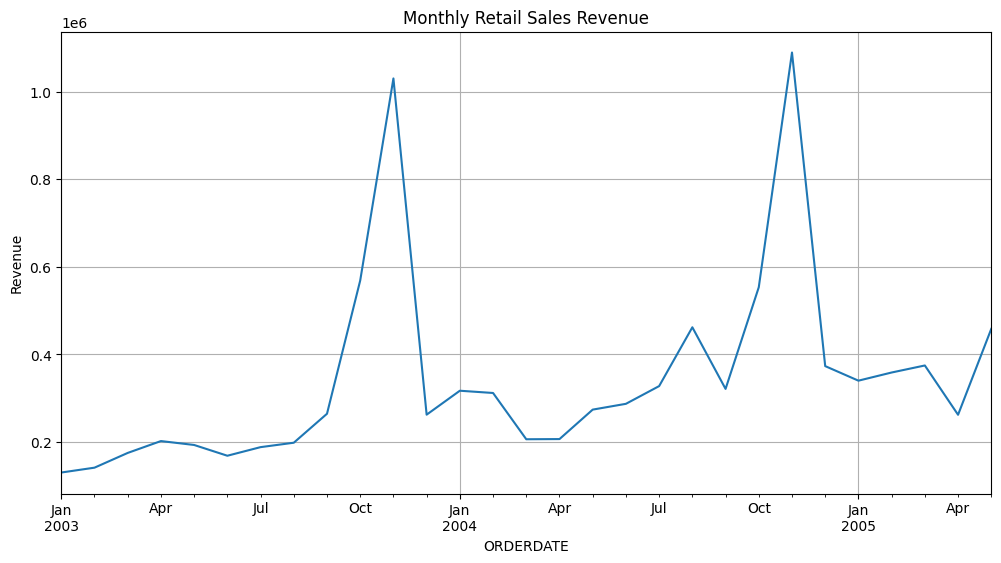

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


df = df.sort_values('ORDERDATE')
df.set_index('ORDERDATE', inplace=True)


monthly_sales = df['SALES'].resample('M').sum()

monthly_sales.plot(figsize=(12, 6), title='Monthly Retail Sales Revenue')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


check if data is stationary

In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_sales.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -3.628783174623225
p-value: 0.005234006614207446


fit arima model

In [15]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.4 MB/s eta 0:00:00


In [17]:
!pip install numpy==1.23.5 --upgrade --force-reinstall


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
blosc2 3.5.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 

In [1]:
!pip install pmdarima


as we restart the session re start the python3

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("sales_data_sample.csv", encoding='latin1')


In [6]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df = df.sort_values('ORDERDATE')
df.set_index('ORDERDATE', inplace=True)


In [7]:
monthly_sales = df['SALES'].resample('M').sum()
monthly_sales.head()


/tmp/ipython-input-7-1182066620.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['SALES'].resample('M').sum()


,SALES
ORDERDATE,
2003-01-31,129753.60
2003-02-28,140836.19
2003-03-31,174504.90
2003-04-30,201609.55
2003-05-31,192673.11


In [8]:
import pmdarima as pm

model = pm.auto_arima(monthly_sales,
                      seasonal=False,
                      stepwise=True,
                      suppress_warnings=True,
                      trace=True)

model.summary()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=809.037, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=834.174, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=806.843, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=824.214, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=807.539, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=805.910, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=806.082, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=807.248, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=826.167, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=801.197, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=799.237, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=800.778, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=801.565, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=799.279, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=803.175, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.662 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   29
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -396.618
Date:                Fri, 11 Jul 2025   AIC                            799.237
Time:                        14:17:11   BIC                            803.339
Sample:                    01-31-2003   HQIC                           800.521
                         - 05-31-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.564e+05   8.18e+04      4.355      0.000    1.96e+05    5.17e+05
ma.L1          0.3676      0.222      1.652      0.098      -0.068       0.804
sigma2      4.853e+10      0.324    1.5e+11      0.000    4.85e+10    4.85e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                24.93
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.72   Skew:                             1.73
Prob(H) (two-sided):                  0.13   Kurtosis:                         5.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.12e+34. Standard errors may be unstable.
"""

forcast next six months

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/tmp/ipython-input-10-2298267722.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


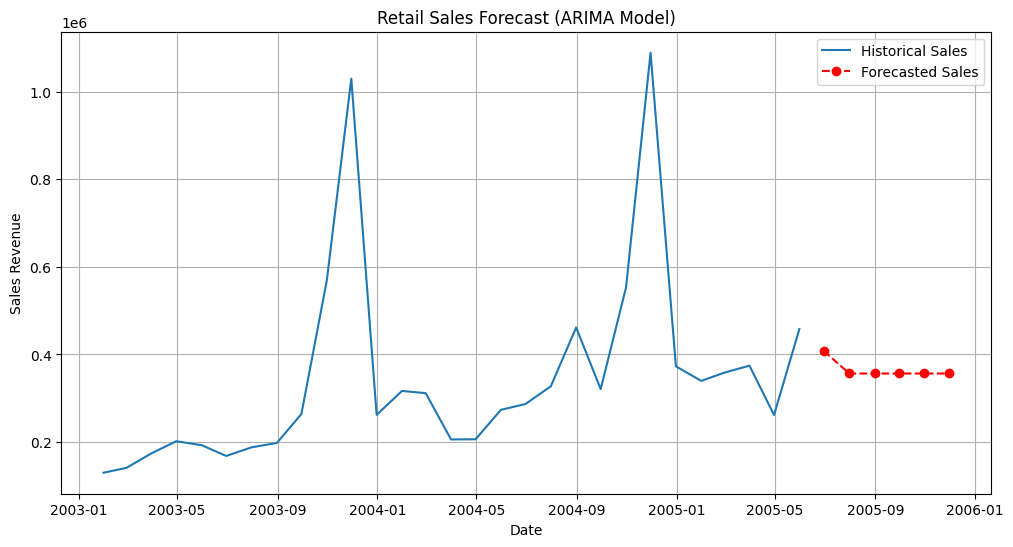

In [10]:

forecast = model.predict(n_periods=6)

future_dates = pd.date_range(
    start=monthly_sales.index[-1] + pd.offsets.MonthBegin(),
    periods=6,
    freq='M'
)


forecast_df = pd.Series(forecast, index=future_dates)


plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_df, label='Forecasted Sales', color='red', linestyle='--', marker='o')
plt.title("Retail Sales Forecast (ARIMA Model)")
plt.xlabel("Date")
plt.ylabel("Sales Revenue")
plt.legend()
plt.grid(True)
plt.show()



install and import prophet

In [11]:
!pip install prophet


In [12]:
from prophet import Prophet


In [13]:

prophet_df = monthly_sales.reset_index()
prophet_df.columns = ['ds', 'y']
prophet_df.head()


,ds,y
0,2003-01-31,129753.60
1,2003-02-28,140836.19
2,2003-03-31,174504.90
3,2003-04-30,201609.55
4,2003-05-31,192673.11


In [14]:
model_prophet = Prophet()
model_prophet.fit(prophet_df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpao2u98zi/jop_354b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpao2u98zi/64vkav17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2727', 'data', 'file=/tmp/tmpao2u98zi/jop_354b.json', 'init=/tmp/tmpao2u98zi/64vkav17.json', 'output', 'file=/tmp/tmpao2u98zi/prophet_model6zjh0gi8/prophet_model-20250711142231.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:22:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

forcast next 6 months

In [15]:

future = model_prophet.make_future_dataframe(periods=6, freq='M')

forecast = model_prophet.predict(future)


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


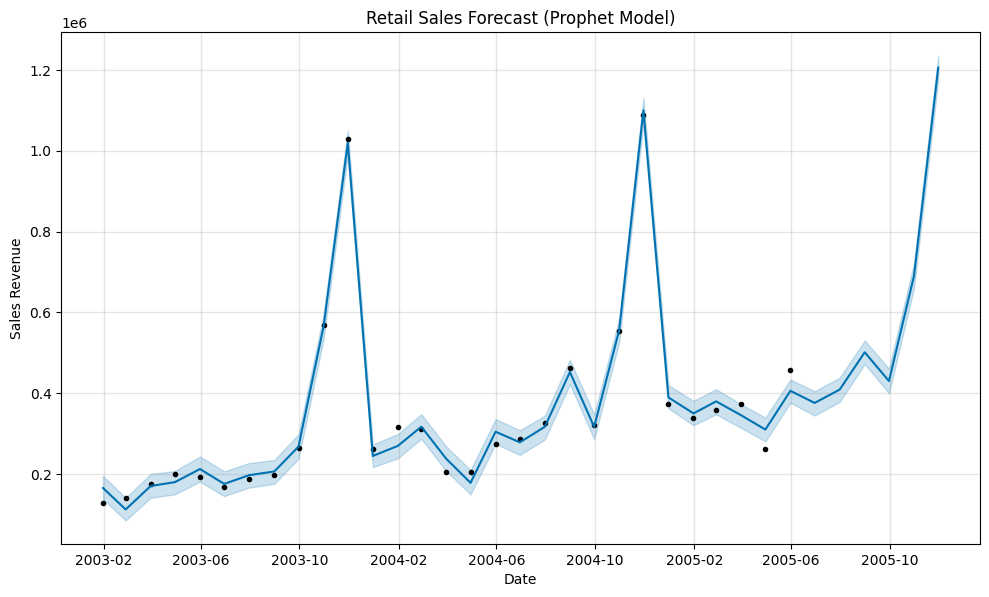

In [16]:
model_prophet.plot(forecast)
plt.title("Retail Sales Forecast (Prophet Model)")
plt.xlabel("Date")
plt.ylabel("Sales Revenue")
plt.grid(True)
plt.show()


prepare xgboost

In [17]:
!pip install xgboost


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

df_ml = monthly_sales.reset_index()
df_ml['month'] = df_ml['ORDERDATE'].dt.month
df_ml['year'] = df_ml['ORDERDATE'].dt.year
df_ml['lag1'] = df_ml['SALES'].shift(1)
df_ml['lag2'] = df_ml['SALES'].shift(2)
df_ml['rolling3'] = df_ml['SALES'].rolling(3).mean()


df_ml = df_ml.dropna()


X = df_ml[['month', 'year', 'lag1', 'lag2', 'rolling3']]
y = df_ml['SALES']


test model training

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model_xgb = XGBRegressor(n_estimators=100)
model_xgb.fit(X_train, y_train)


y_pred = model_xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost RMSE: {rmse:.2f}")


XGBoost RMSE: 294623.92


actual vs prediction

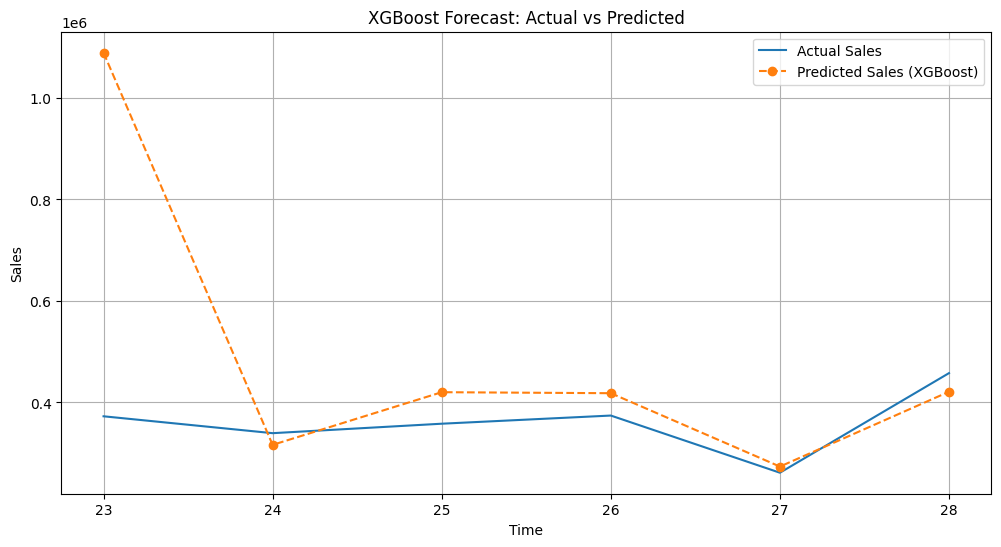

In [20]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual Sales')
plt.plot(y_test.index, y_pred, label='Predicted Sales (XGBoost)', linestyle='--', marker='o')
plt.title("XGBoost Forecast: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


reuse arima

In [21]:
forecast_df


,0
2005-06-30,407776.321478
2005-07-31,356387.334064
2005-08-31,356387.334064
2005-09-30,356387.334064
2005-10-31,356387.334064
2005-11-30,356387.334064


prophet

In [22]:
prophet_forecast = forecast[['ds', 'yhat']].set_index('ds')
prophet_future = prophet_forecast.loc[forecast_df.index]


In [24]:

last_date = df_ml['ORDERDATE'].max()
future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(), periods=6, freq='M')

future_xgb = pd.DataFrame({
    'month': future_dates.month,
    'year': future_dates.year,
    'lag1': df_ml['SALES'].iloc[-1],
    'lag2': df_ml['SALES'].iloc[-2],
    'rolling3': df_ml['SALES'].tail(3).mean()
}, index=future_dates)

xgb_forecast = pd.Series(model_xgb.predict(future_xgb), index=future_dates)


plot all together

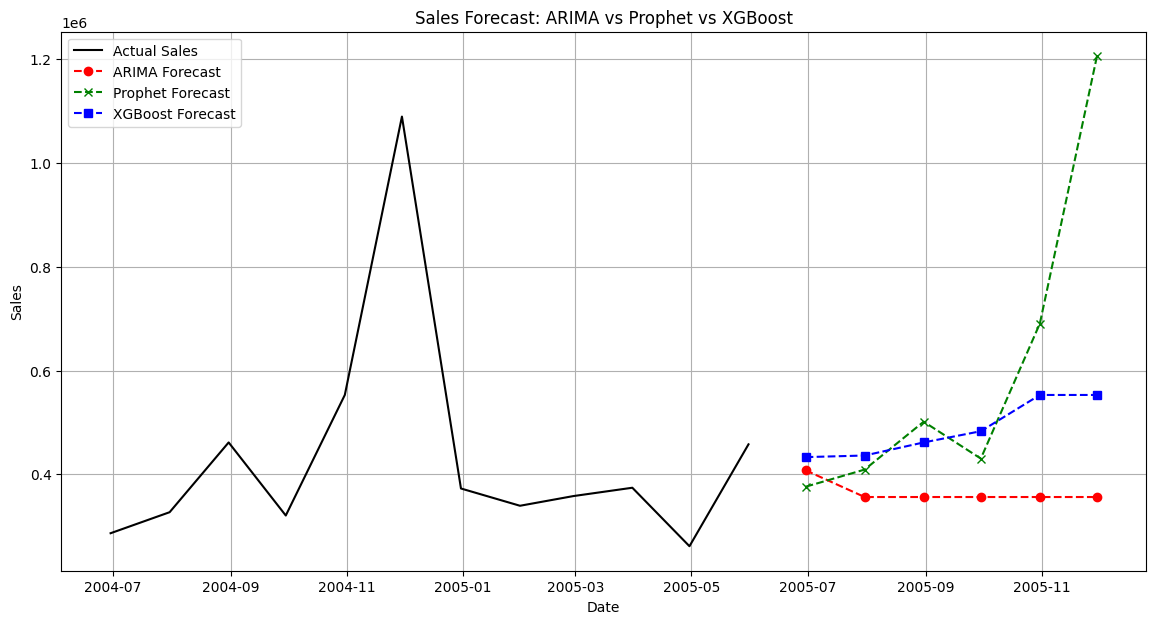

In [25]:
plt.figure(figsize=(14, 7))


plt.plot(monthly_sales[-12:], label="Actual Sales", color="black")


plt.plot(forecast_df, label="ARIMA Forecast", linestyle="--", marker="o", color="red")


plt.plot(prophet_future['yhat'], label="Prophet Forecast", linestyle="--", marker="x", color="green")


plt.plot(xgb_forecast, label="XGBoost Forecast", linestyle="--", marker="s", color="blue")

plt.title("Sales Forecast: ARIMA vs Prophet vs XGBoost")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


In [26]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import joblib
joblib.dump(model_xgb, 'xgb_model.pkl')


['xgb_model.pkl']

In [28]:
!cp xgb_model.pkl /content/drive/MyDrive/


In [29]:
from google.colab import files


files.download('xgb_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.upload("kaggle.json")